In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ASSIGNMENTS/FA_assignment/multihop-outdoor-moteid1-data-converted_wo_head.csv', 
                   delimiter= ',')
print(data.head(10))

   Reading#  Mote ID  Humidity  Tepmrature  Label
0         1        1     43.82       30.21      0
1         2        1     43.79       30.20      0
2         3        1     43.79       30.19      0
3         4        1     43.79       30.19      0
4         5        1     43.79       30.19      0
5         6        1     43.79       30.19      0
6         7        1     43.79       30.19      0
7         8        1     43.79       30.19      0
8         9        1     43.79       30.21      0
9        10        1     43.79       30.22      0


In [0]:
xtrain = data.iloc[:, 0:-1]
ytrain = data.iloc[:, -1]

In [0]:
true_labels = np.array(ytrain)

In [0]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(xtrain)
kmeans.cluster_centers_.shape

(4, 4)

In [0]:
kmns = KMeans(n_clusters=4, random_state=0).fit(xtrain)
core_samples_mask = np.zeros_like(kmns.labels_, dtype=bool)
# core_samples_mask[kmns.core_sample_indices_] = True
labels_kmns = kmns.labels_

In [0]:
labels_kmeans = np.zeros_like(clusters)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_kmeans, ytrain)

0.9876332622601279

Text(0.5, 1.0, 'K-means')

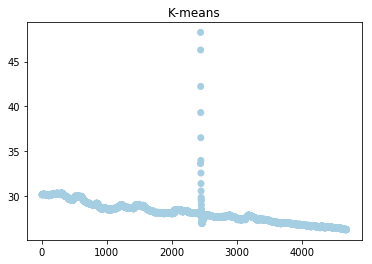

In [0]:
plt.scatter(xtrain.iloc[:,0], xtrain.iloc[:,3],c=labels_kmeans, cmap='Paired')
plt.title("K-means")

In [0]:
# from sklearn.metrics import confusion_matrix
# mat = confusion_matrix(labels_kmeans, ytrain)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=labels_kmeans,
#             yticklabels=ytrain)
# plt.xlabel('true label')
# plt.ylabel('predicted label');

from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain, labels_kmeans)

array([[4632,    0],
       [  58,    0]])

In [0]:
from sklearn.metrics import f1_score
f1_score(ytrain, labels_kmeans, average='macro') 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.49688907959665307

In [0]:
from sklearn.metrics import average_precision_score
average_precision_score(ytrain, labels_kmeans)

0.012366737739872069

In [0]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(ytrain, labels_kmeans)
print(precision, recall)

[0.01236674 1.        ] [1. 0.]


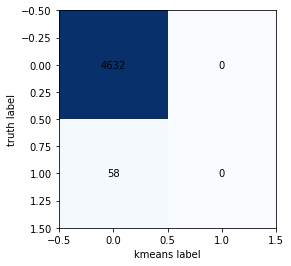

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytrain, labels_kmeans)
plt.imshow(cm,interpolation='none',cmap='Blues')

for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
    
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [0]:
from sklearn import metrics

true_labels = np.array(ytrain)

ARI = metrics.adjusted_rand_score(true_labels, labels_kmeans) 

MI = metrics.adjusted_mutual_info_score(true_labels, labels_kmeans)

print(ARI, MI)

0.0 -1.0416589338815997e-16


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
# from sklearn.cluster import OPTICS, cluster_optics_dbscan

# clust2 = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

# # Run the fit
# clust2.fit(xtrain)

In [0]:
data2 = data

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data2)

data2 = pd.DataFrame(np_scaled)

pca = PCA(n_components=2)
data = pca.fit_transform(data2)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

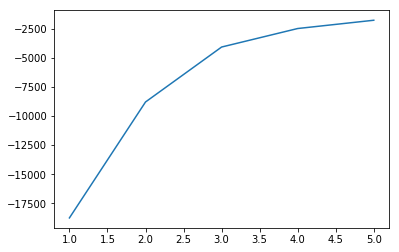

In [0]:
n_cluster = range(1, 6)
kmeans = [KMeans(n_clusters=i).fit(data2) for i in n_cluster]
scores = [kmeans[i].score(data2) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [0]:
# if taking feature 0 and feature 1 as the principal components
data['cluster'] = kmeans[4].predict(data2)
data['principal_feature1'] = data[0]
data['principal_feature2'] = data[1]
data['cluster'].value_counts()

0    1384
3    1321
1    1202
4     725
2      58
Name: cluster, dtype: int64

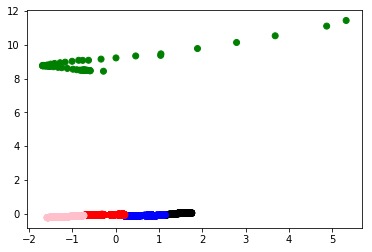

In [0]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black'}
ax.scatter(data['principal_feature1'], data['principal_feature2'], 
           c=data["cluster"].apply(lambda x: colors[x]))
plt.show()

In [0]:
data['cluster'] = kmeans[4].predict(data2)
data['principal_feature1'] = data[0]
data['principal_feature2'] = data[1]
data['cluster'].value_counts()

0    1384
3    1321
1    1202
4     725
2      58
Name: cluster, dtype: int64

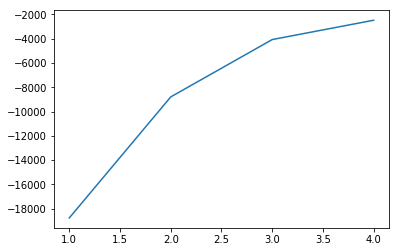

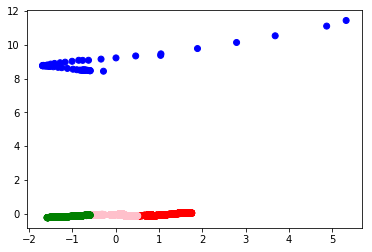

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data2)

data2 = pd.DataFrame(np_scaled)

pca = PCA(n_components=2)
data = pca.fit_transform(data2)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

n_cluster = range(1, 5)
kmeans = [KMeans(n_clusters=i).fit(data2) for i in n_cluster]
scores = [kmeans[i].score(data2) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

# if taking feature 0 and feature 1 as the principal components
data['cluster'] = kmeans[3].predict(data2)
data['principal_feature1'] = data[0]
data['principal_feature2'] = data[1]
data['cluster'].value_counts()


fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black'}
ax.scatter(data['principal_feature1'], data['principal_feature2'], 
           c=data["cluster"].apply(lambda x: colors[x]))
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


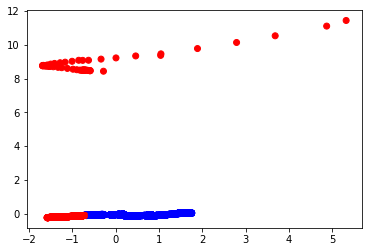

In [0]:
outliers_fraction = 0.3


def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance



distance = getDistanceByPoint(data2, kmeans[3])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
data['anomaly21'] = (distance >= threshold).astype(int)


fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(data['principal_feature1'], data['principal_feature2'], c=data["anomaly21"].apply(lambda x: colors[x]))
plt.show()

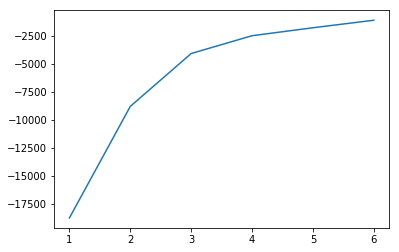

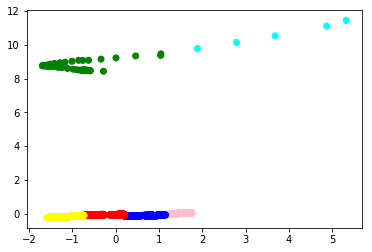

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data2)

data2 = pd.DataFrame(np_scaled)

pca = PCA(n_components=2)
data = pca.fit_transform(data2)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)


n_cluster = range(1, 7)
kmeans = [KMeans(n_clusters=i).fit(data2) for i in n_cluster]
scores = [kmeans[i].score(data2) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

# if taking feature 0 and feature 1 as the principal components
data['cluster'] = kmeans[5].predict(data2)
data['principal_feature1'] = data[0]
data['principal_feature2'] = data[1]
data['cluster'].value_counts()


fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'yellow', 5:'cyan', 6:'purple'}
ax.scatter(data['principal_feature1'], data['principal_feature2'], 
           c=data["cluster"].apply(lambda x: colors[x]))
plt.show()

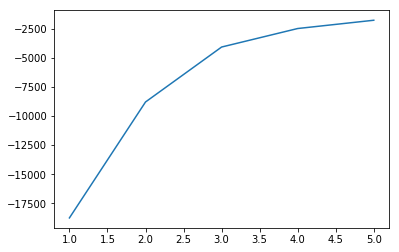

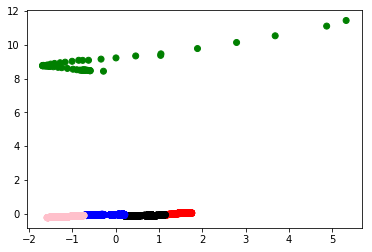

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data2)

data2 = pd.DataFrame(np_scaled)

pca = PCA(n_components=2)
data = pca.fit_transform(data2)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

n_cluster = range(1, 6)
kmeans = [KMeans(n_clusters=i).fit(data2) for i in n_cluster]
scores = [kmeans[i].score(data2) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

# if taking feature 0 and feature 1 as the principal components
data['cluster'] = kmeans[4].predict(data2)
data['principal_feature1'] = data[0]
data['principal_feature2'] = data[1]
data['cluster'].value_counts()


fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'cyan'}
ax.scatter(data['principal_feature1'], data['principal_feature2'], 
           c=data["cluster"].apply(lambda x: colors[x]))
plt.show()

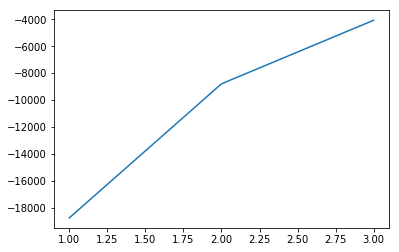

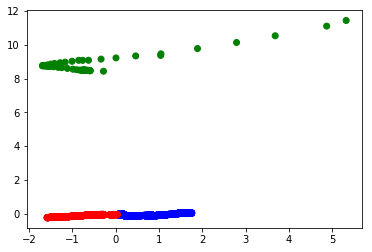

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data2)

data2 = pd.DataFrame(np_scaled)

pca = PCA(n_components=2)
data = pca.fit_transform(data2)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

n_cluster = range(1, 4)
kmeans = [KMeans(n_clusters=i).fit(data2) for i in n_cluster]
scores = [kmeans[i].score(data2) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

# if taking feature 0 and feature 1 as the principal components
data['cluster'] = kmeans[2].predict(data2)
data['principal_feature1'] = data[0]
data['principal_feature2'] = data[1]
data['cluster'].value_counts()


fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'cyan'}
ax.scatter(data['principal_feature1'], data['principal_feature2'], 
           c=data["cluster"].apply(lambda x: colors[x]))
plt.show()

In [0]:
# labels_kmeans = np.zeros_like(labels_kmeans)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_kmns)) - (1 if -1 in labels else 0)
n_noise_ = list(labels_kmns).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_labels, labels_kmns))
print("Completeness: %0.3f" % metrics.completeness_score(true_labels, labels_kmns))
print("V-measure: %0.3f" % metrics.v_measure_score(true_labels, labels_kmns))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(true_labels, labels_kmns))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(true_labels, labels_kmns))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(xtrain, labels_kmns))


Estimated number of clusters: 4
Estimated number of noise points: 0
Homogeneity: 0.260
Completeness: 0.013
V-measure: 0.024
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.012


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Coefficient: 0.572


In [0]:
from sklearn.cluster import DBSCAN
import time

t0 = time.time()

clust3 = DBSCAN(eps=3, min_samples=4)
y_dbscan = clust3.fit(xtrain)
t0 = time.time()
labels_dbscan = clust3.labels_

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_dbscan, ytrain)

0.5251599147121535

Text(0.5, 1.0, 'DBSCAN')

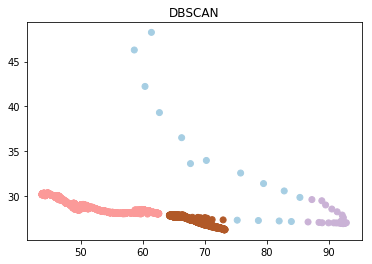

In [0]:
plt.scatter(xtrain.iloc[:,2], xtrain.iloc[:,3],c=labels_dbscan, cmap='Paired')
plt.title("DBSCAN")

In [0]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, labels_dbscan))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.53      0.69      4632
           1       1.00      0.40      0.57        58
           2       0.00      0.00      0.00         0

   micro avg       0.53      0.53      0.53      4690
   macro avg       0.50      0.23      0.31      4690
weighted avg       1.00      0.53      0.69      4690



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(true_labels, labels_dbscan, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.4998975829578042, 0.23083050443690073, 0.31446223074009494, None)

In [0]:
from sklearn.metrics import f1_score
f1_score(true_labels, labels_dbscan, average='macro') 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.31446223074009494

In [0]:
from sklearn.metrics import average_precision_score
average_precision_score(true_labels, labels_dbscan)

0.013627270686497788

In [0]:
from  sklearn.cluster import Birch
from sklearn import cluster

birch = Birch(branching_factor=50, n_clusters=None, threshold=0.5, 
            compute_labels=True)
y_brc = birch.fit(xtrain)
labels_birch= birch.predict(xtrain)
# labels_birch = birch.labels_

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_birch, ytrain)

0.00021321961620469082

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score


data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ASSIGNMENTS/FA_assignment/multihop-outdoor-moteid1-data-converted_wo_head.csv', 
                   delimiter= ',')
print(data.head(10))


xtrain = data.iloc[:, 0:-1]
ytrain = data.iloc[:, -1]

true_labels = np.array(ytrain)
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit(xtrain)
kmeans.cluster_centers_.shape
labels_kmeans = clusters.labels_

print('Precision Score:', precision_score(true_labels, labels_kmeans, average='macro'))
print('Recall Score:', recall_score(true_labels, labels_kmeans, average='macro'))
print('F1 Score:', f1_score(true_labels, labels_kmeans, average='macro'))

   Reading#  Mote ID  Humidity  Tepmrature  Label
0         1        1     43.82       30.21      0
1         2        1     43.79       30.20      0
2         3        1     43.79       30.19      0
3         4        1     43.79       30.19      0
4         5        1     43.79       30.19      0
5         6        1     43.79       30.19      0
6         7        1     43.79       30.19      0
7         8        1     43.79       30.19      0
8         9        1     43.79       30.21      0
9        10        1     43.79       30.22      0
Precision Score: 0.5123667377398721
Recall Score: 0.7531303972366148
F1 Score: 0.3602408388873709


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ASSIGNMENTS/FA_assignment/multihop-outdoor-moteid1-data-converted_wo_head.csv', 
                   delimiter= ',')
print(data.head(10))


xtrain = data.iloc[:, 0:-1]
ytrain = data.iloc[:, -1]

true_labels = np.array(ytrain)


from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.cluster import DBSCAN
import time

# t0 = time.time()

clust3 = DBSCAN(eps=7, min_samples=4)
y_dbscan = clust3.fit(xtrain)
# t0 = time.time()
labels_dbscan = clust3.labels_

from sklearn.metrics import accuracy_score
accuracy_score(labels_dbscan, ytrain)

print('Precision Score:', precision_score(true_labels, labels_dbscan, average='macro'))
print('Recall Score:', recall_score(true_labels, labels_dbscan, average='macro'))
print('F1 Score:', f1_score(true_labels, labels_dbscan, average='macro'))

   Reading#  Mote ID  Humidity  Tepmrature  Label
0         1        1     43.82       30.21      0
1         2        1     43.79       30.20      0
2         3        1     43.79       30.19      0
3         4        1     43.79       30.19      0
4         5        1     43.79       30.19      0
5         6        1     43.79       30.19      0
6         7        1     43.79       30.19      0
7         8        1     43.79       30.19      0
8         9        1     43.79       30.21      0
9        10        1     43.79       30.22      0
Precision Score: 0.4998975829578042
Recall Score: 0.1489339527127628
F1 Score: 0.20474498661424864


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
